In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# let select a background style

plt.style.use('fivethirtyeight')
# for ipywidgets as widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
df = pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2081 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [6]:
# changing the names of the columns inside the data
df.columns = ["SrNo", "Date", "StartupName", "IndustryVertical",
       "SubVertical", "City", "InvestorsName", "InvestmentType",
       "AmountInUSD", "Remarks"]

In [7]:
df.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.shape

(3044, 10)

# Data Cleaning

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# lets check the total missing value
df.isnull().sum()

SrNo                   0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
AmountInUSD          963
Remarks             2625
dtype: int64

In [11]:
# lets remove remarks column ,as it contain a lot of nans
df = df.drop(['Remarks'], axis = 1)
df.columns

Index(['SrNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [12]:
# lets convert the amount column into numerical
def clean_amount(x):
    x = "".join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",", " ").replace("+", " ")
    x = str(x).lower().replace('undisclosed', "")
    x = str(x).lower().replace("n/a", "")
    if x == '':
        x = '-999'
    return x    

In [13]:
# lets apply the function on the column
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

In [14]:
# lets check the total missing value
df.isnull().sum()

SrNo                  0
Date                  0
StartupName           0
IndustryVertical    171
SubVertical         936
City                180
InvestorsName        24
InvestmentType        4
AmountInUSD           0
dtype: int64

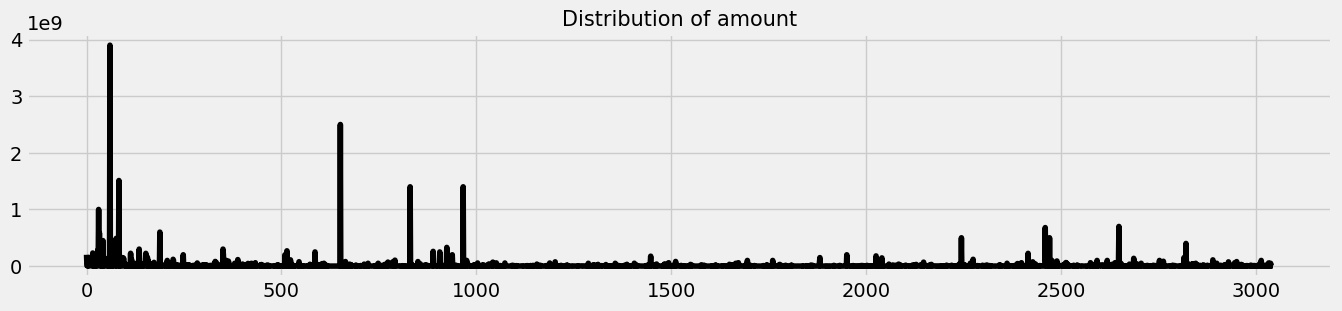

In [15]:
# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15,3)
df['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title("Distribution of amount", fontsize =15)
plt.show()

In [16]:
# cleaning the dates
df['Date'][df['Date'] == '12/05.2015'] = '12-05-2015'
df['Date'][df['Date'] == '13/04.2015'] = '13-04-2015'
df['Date'][df['Date'] == '15/01.2015'] = '15-01-2015'
df['Date'][df['Date'] == '22/01//2015'] = '22-01-2015'
df['Date'][df['Date'] == '05/072018'] = '05-07-2018'
df['Date'][df['Date'] == '01/07/015'] = '01-07-2015'

In [17]:
from datetime import datetime

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Change the format of the date column
df['Formatted Date'] = df['Date'].dt.strftime('%d/%m/%y')

# Print the DataFrame with the formatted date column
print(df)

      SrNo       Date                   StartupName     IndustryVertical  \
0        1 2020-01-09                        BYJU’S               E-Tech   
1        2 2020-01-13                        Shuttl       Transportation   
2        3 2020-01-09                     Mamaearth           E-commerce   
3        4 2020-01-02  https://www.wealthbucket.in/              FinTech   
4        5 2020-01-02                        Fashor  Fashion and Apparel   
...    ...        ...                           ...                  ...   
3039  3040 2015-01-29                    Printvenue                  NaN   
3040  3041 2015-01-29                      Graphene                  NaN   
3041  3042 2015-01-30                Mad Street Den                  NaN   
3042  3043 2015-01-30                     Simplotel                  NaN   
3043  3044 2015-01-31              couponmachine.in                  NaN   

                                SubVertical       City  \
0                            

In [19]:
df.to_csv('clean_movie.csv')

# querying the data visualization 

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


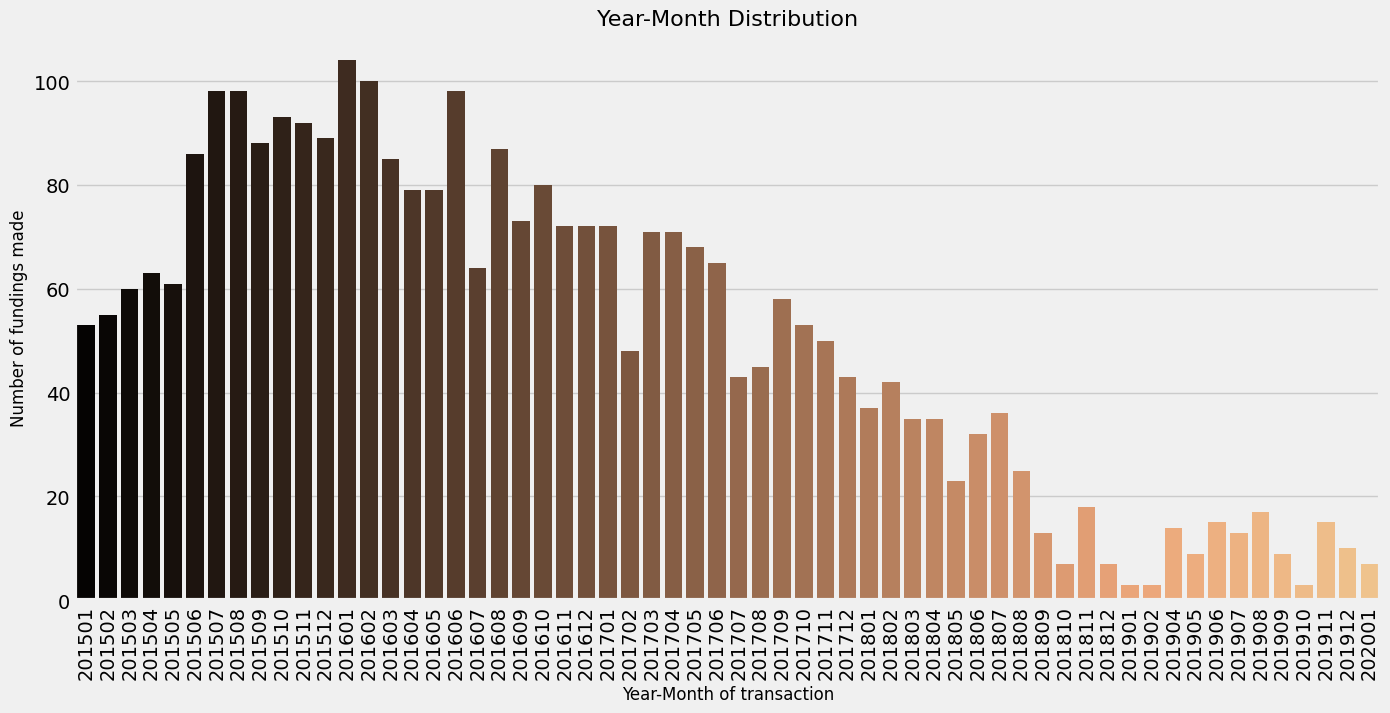

In [96]:
# converting them into a Datetime object
df["yearmonth"] = (pd.to_datetime(df['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)


temp = df['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

# What is the General Amount that Startups get in india. 

In [ ]:
# check the Maximum funding of a startups get in india
print("Maximum funding to a startups is : ", df['AmountInUSD'].dropna().sort_values().max())

Maximum funding to a startups is :  3900000000.0


In [98]:
# check the startups with more than 50 crore funding 
@interact
def check(column = 'AmountInUSD', x = 500000000):
    return df[df[column]>x].sort_values( by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [99]:
# check the different venture of paytm
df[df.StartupName == 'Paytm']

,SrNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Formatted Date,yearmonth
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,25/11/19,201911
251,252,2018-06-26,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,26/06/18,201806
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,18/05/17,201705
1493,1494,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,30/08/16,201608
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,29/09/15,201509
2890,2891,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02,13/03/15,201503
2948,2949,2015-02-05,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,05/02/15,201502


In [100]:
# check out different ventures of Flipkart
df[df.StartupName == 'Flipkart']

,SrNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Formatted Date,yearmonth
651,652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,11/08/17,201708
773,774,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,26/06/17,201706
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,21/03/17,201703
1032,1033,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,20/02/17,201702
2689,2690,2015-06-04,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,04/06/15,201506


In [101]:
# check the minimum funding in a startup
print("minimum funding to a startups is :", df['AmountInUSD'].dropna().sort_values().min())

minimum funding to a startups is : -999.0


In [102]:
df[['AmountInUSD', 'StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(10)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox
1463,-999.0,Fitternity
2166,-999.0,STAGE 3
713,-999.0,Creator\\xe2\\x80\\x99s Gurukul
2465,-999.0,LoanCircle
1461,-999.0,Zzungry


In [103]:
# lets check the number of startups with no funding
df[df['AmountInUSD'] == -999.0].shape

(970, 11)

In [104]:
# ckeck the number of funding that each startups get.
print('on Average Startups got funding of:', df['AmountInUSD'].dropna().sort_values().mean())

on Average Startups got funding of: 13270058.595926413


In [105]:
#  check no of funding each startups got
print("Total startup funded :", len(df['StartupName'].unique()))
print(df['StartupName'].value_counts().head(10))
Startupname = df['StartupName'].value_counts().head(20)

Total startup funded : 2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


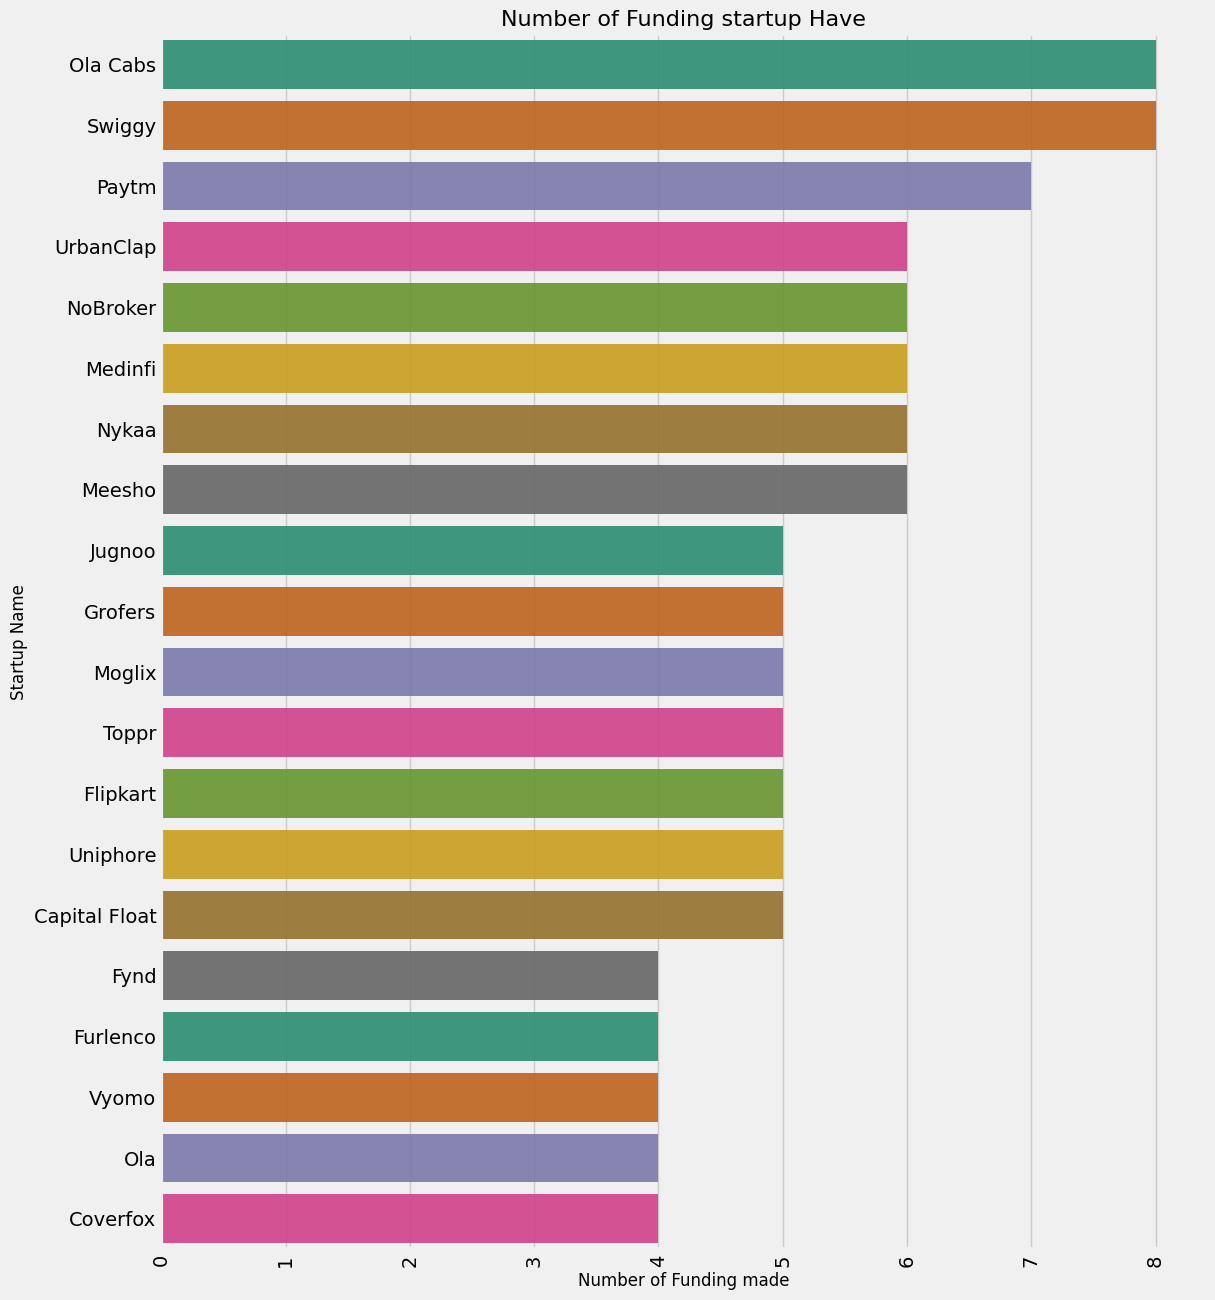

In [106]:
# plot the data
plt.rcParams['figure.figsize'] = (12,15)
sns.barplot(y = Startupname.index, x = Startupname.values, alpha = 0.9, palette = 'Dark2')

plt.xticks(rotation = 'vertical')
plt.xlabel("Number of Funding made", fontsize = 12)
plt.ylabel("Startup Name", fontsize = 12)
plt.title("Number of Funding startup Have", fontsize = 16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

In [107]:
# data Cleaning 
df['IndustryVertical'] = df['IndustryVertical'].replace('nan', 'Consumer Technology')
Industry = df['IndustryVertical'].value_counts().head(10)
print(Industry)

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: IndustryVertical, dtype: int64


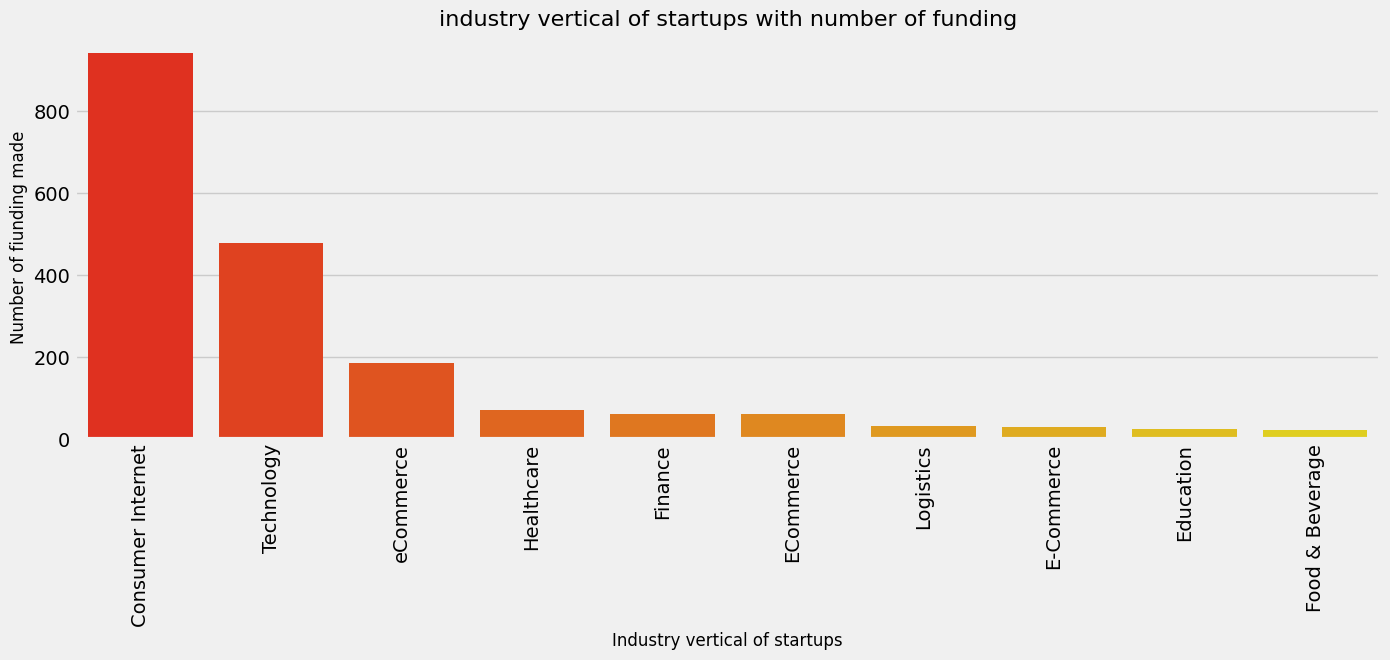

In [108]:
# plot the data
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(Industry.index, Industry.values, palette = 'autumn')
plt.xticks(rotation = 'vertical')
plt.xlabel('Industry vertical of startups', fontsize =12)
plt.ylabel('Number of fiunding made', fontsize = 12)
plt.title("industry vertical of startups with number of funding", fontsize =16)
plt.show()

Online Pharmacy                  10
Food Delivery Platform            8
Online Education Platform         5
Education                         5
Online lending platform           5
Online Learning Platform          5
Online Lending                    5
Non-Banking Financial Company     4
Online Food Delivery              4
B2B Marketplace                   3
Name: SubVertical, dtype: int64


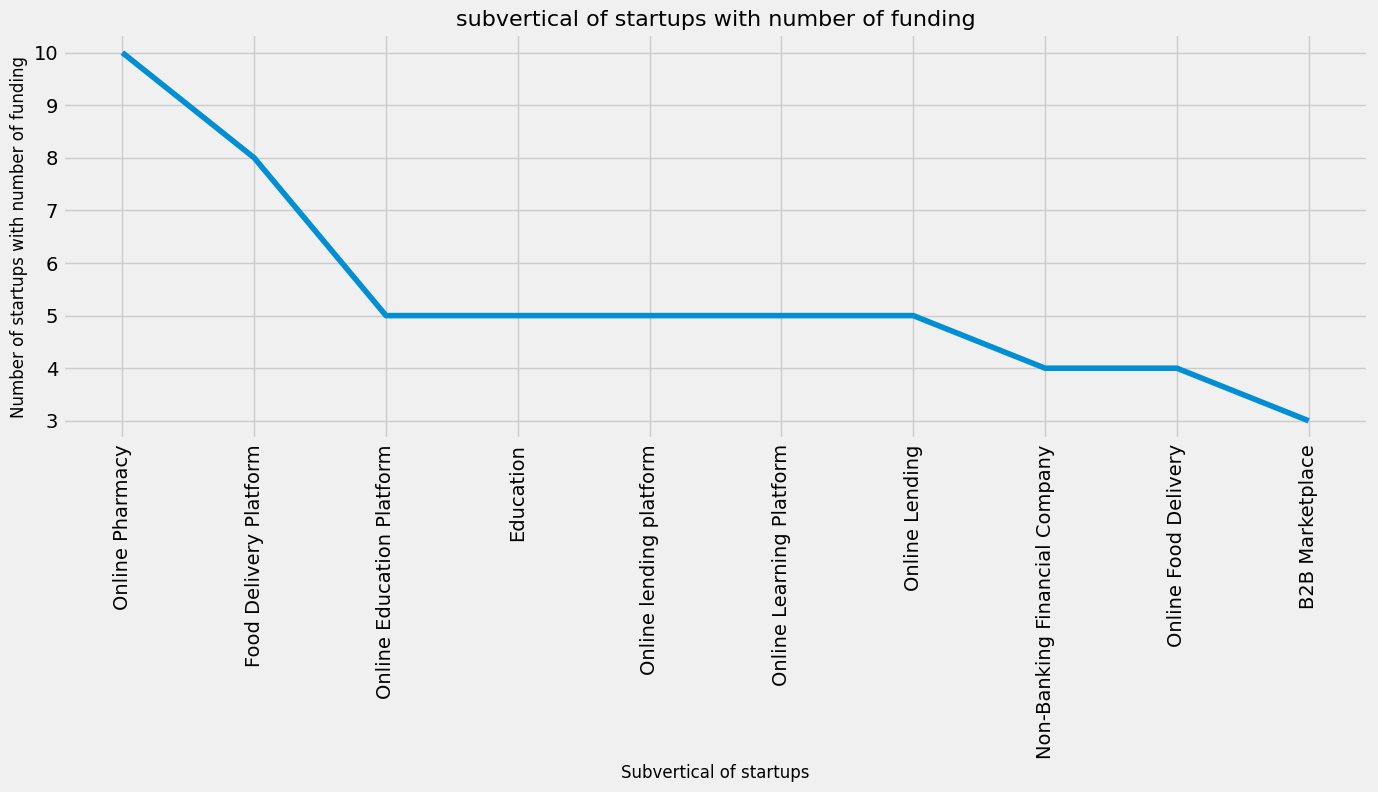

In [109]:
industry = df['SubVertical'].value_counts()[1:].head(10)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation = 'vertical')
plt.xlabel("Subvertical of startups", fontsize =12)
plt.ylabel("Number of startups with number of funding", fontsize =12)
plt.title("subvertical of startups with number of funding", fontsize=16)
plt.show()

## does location also play a role in determing the grouth of a startups.


In [110]:
# clean the data for batter analysis
df['City'] = df['City'].replace(['Bengaluru', 'nan'], ['Bangalore', 'Bangalore'])
city = df['City'].value_counts().head(10)
print(city)

Bangalore    842
Mumbai       568
New Delhi    424
Gurgaon      291
Pune         105
Hyderabad     99
Chennai       97
Noida         93
Gurugram      50
Ahmedabad     38
Name: City, dtype: int64


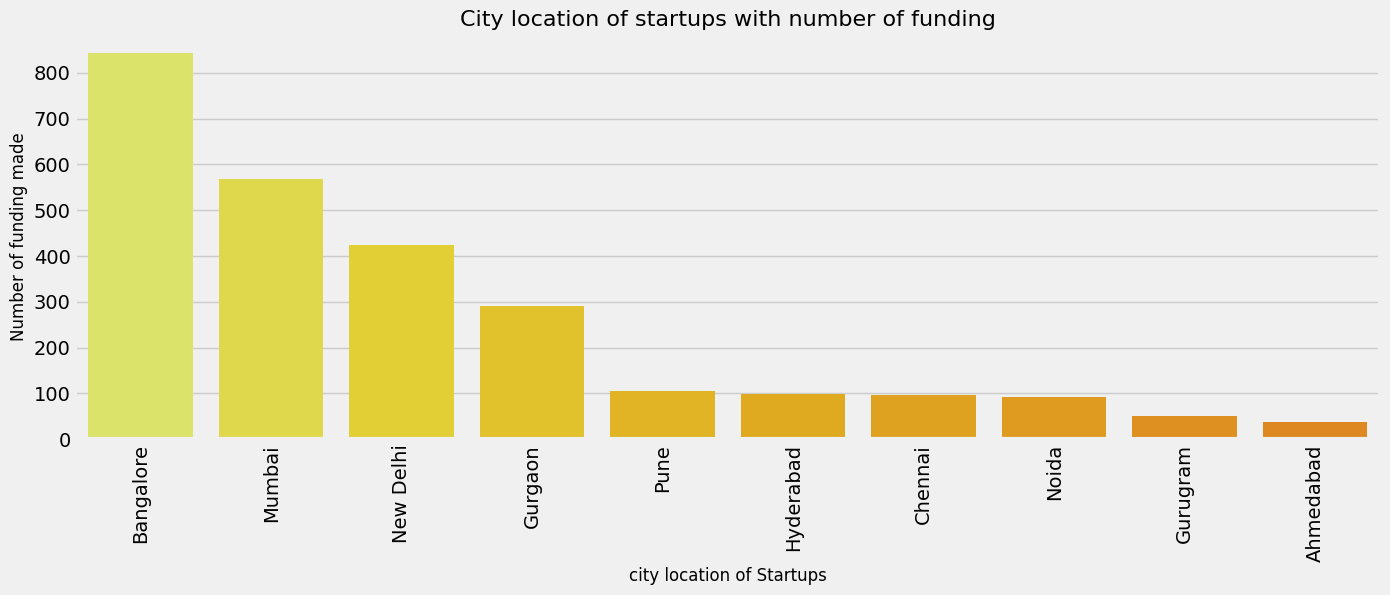

In [111]:
# plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation = 'vertical')
plt.xlabel("city location of Startups", fontsize = 12)
plt.ylabel("Number of funding made", fontsize =12)
plt.title("City location of startups with number of funding", fontsize = 16)
plt.show()

## who play the main role in indian startups ecosystem

In [112]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


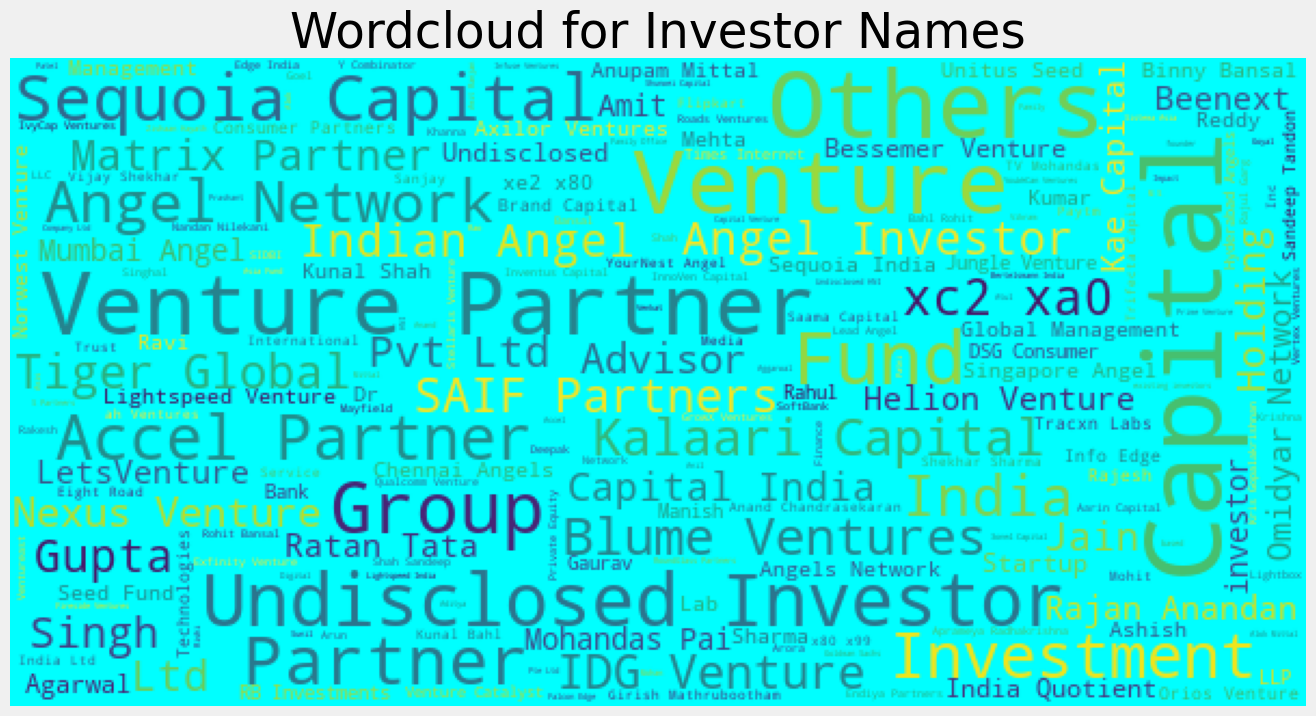

In [113]:
from wordcloud import WordCloud

names = df["InvestorsName"][~pd.isnull(df["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


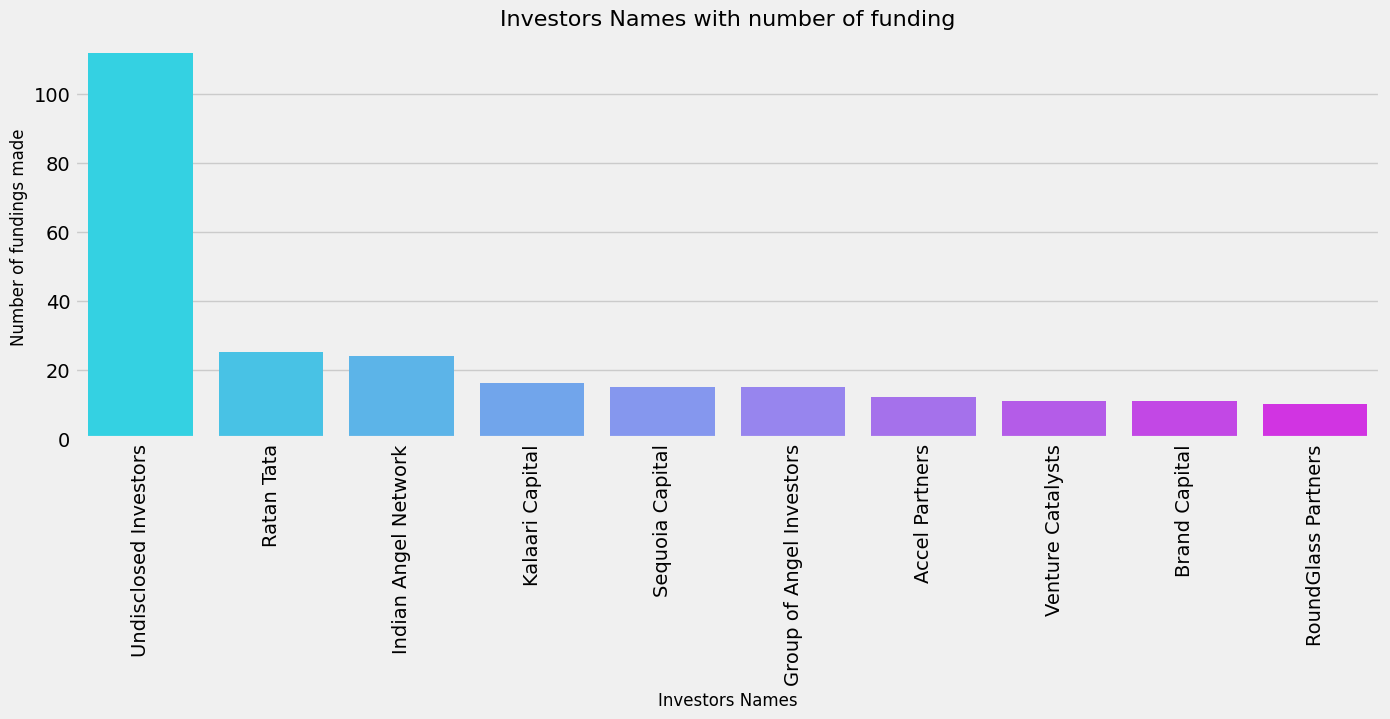

In [114]:
# analyze the investors on startups

# clean the dataset
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# check the value counts
investors = df['InvestorsName'].value_counts().head(10)
print(investors)

#  plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## what are the different type of funding for startups.

In [115]:
# analyze the investment
Investment = df['InvestmentType'].value_counts().head(20)
print(Investment)

Seed Funding            1385
Private Equity          1357
Seed/ Angel Funding       60
Seed / Angel Funding      47
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Series D                  12
Angel / Seed Funding       8
Seed Round                 7
Private Equity Round       4
Seed                       4
Pre-Series A               4
Seed / Angle Funding       3
Equity                     2
Venture Round              2
pre-Series A               2
Series E                   2
Name: InvestmentType, dtype: int64


In [129]:
# lets clean the data
df['InvestmentType'][df['InvestmentType'] == 'Seed funding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType'] == 'seedFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType'] == 'Seed\\nFunding'] = 'Seed Funding'
df['InvestmentType'][df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
df['InvestmentType'][df['InvestmentType'] == 'pre-Series A'] = 'Pre-Series A'
df['InvestmentType'][df['InvestmentType'] == 'Seed/ Angel Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Seed/Angel Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Seed / Angel Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Seed\\Angel Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Angel / Seed Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Seed\\Angle Funding'] = 'Seed Angel Funding'
df['InvestmentType'][df['InvestmentType'] == 'Pre-series A'] = 'Pre-Series A'
df['InvestmentType'][df['InvestmentType'] == 'Pre Series A'] = 'Pre-Series A'
df['InvestmentType'][df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
df['InvestmentType'][df['InvestmentType'] == 'Debt'] = 'Debt-Funding'
df['InvestmentType'][df['InvestmentType'] == 'Private'] = 'Private Funding'

In [135]:
# analyze the investment
Investment = df['InvestmentType'].value_counts().head(10)
print(Investment)

Seed Funding          1386
Private Equity        1358
Seed Angel Funding     141
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
Pre-Series A             8
Seed Round               7
Name: InvestmentType, dtype: int64


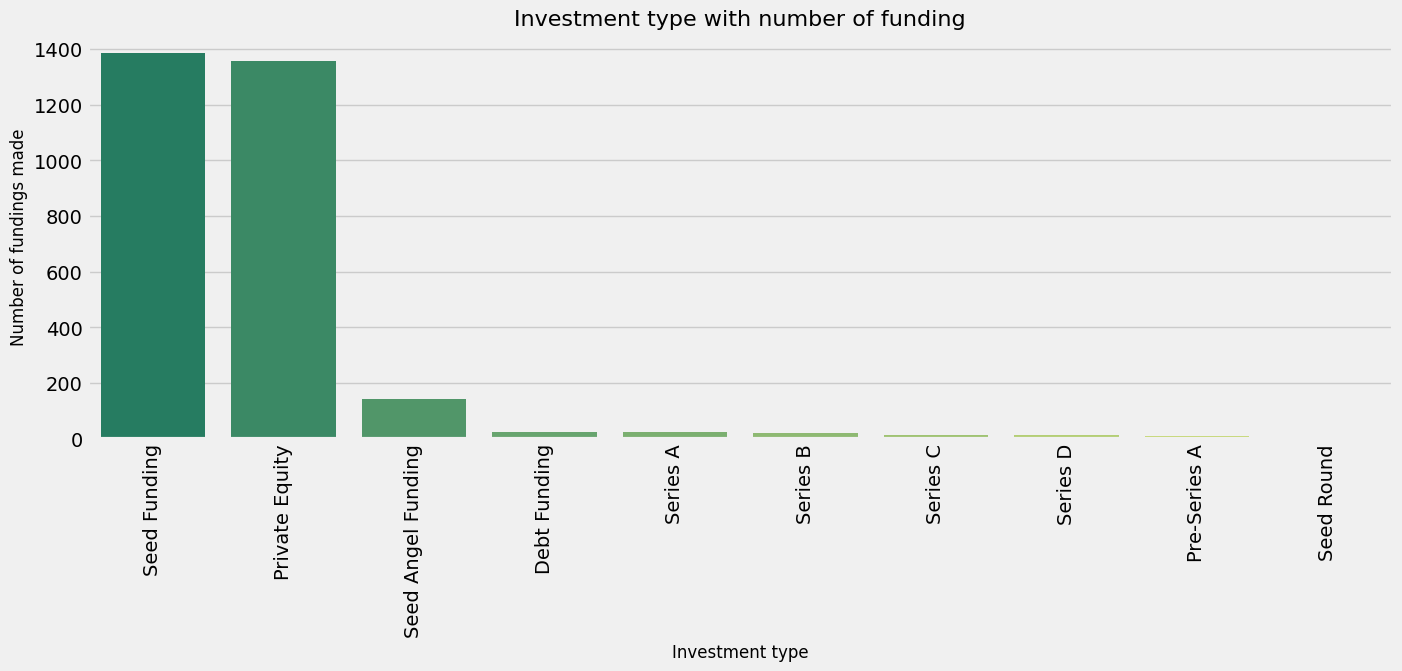

In [136]:
# plot the data
sns.barplot(Investment.index, Investment.values, palette = 'summer')
plt.xticks(rotation = 'vertical')
plt.xlabel("Investment type", fontsize =12)
plt.ylabel("Number of fundings made", fontsize =12)
plt.title("Investment type with number of funding", fontsize =16)
plt.show()